# 1. SMA(Simple Moving Average)

- $d_{k} = {1 \over k} (p_1 + p_2 + ... + p_k) $

- $d_{k+1} = {1 \over k} (p_2 + p_3 + ... + p_{k+1}) $

- 주의할점: cheating
  - 미래에서 과거를 바라보는 시점으로 백테스트를 진행할 경우 현실과 괴리가 생길 수 있음을 생각하자

In [40]:
import pandas as pd
import numpy as np

from pandas import DataFrame

import FinanceDataReader as fdr

from initializer import init

init()
%matplotlib inline

df: DataFrame = fdr.DataReader("005930", "2014-01-02", "2020-10-30")
df = df[["Close"]]
df.columns = ["삼성전자"]
df.head(3)

,삼성전자
Date,
2014-01-02,26180
2014-01-03,25920
2014-01-06,26140


## 1.1. `rolling()`

In [41]:
df.rolling(window=5)        # 5일 단위로 집계할 준비
df.rolling(window=5).mean() # 5일 이동평균선

Rolling [window=5,center=False,axis=0,method=single]

,삼성전자
Date,
2014-01-02,NaN
2014-01-03,NaN
2014-01-06,NaN
2014-01-07,NaN
2014-01-08,26028.000
...,...
2020-10-26,60500.000
2020-10-27,60280.000
2020-10-28,59900.000


In [42]:
df.loc[:, "삼성전자_5_SMA"] = df["삼성전자"].rolling(window=5).mean()
df.head(10)

,삼성전자,삼성전자_5_SMA
Date,,
2014-01-02,26180,NaN
2014-01-03,25920,NaN
2014-01-06,26140,NaN
2014-01-07,26080,NaN
2014-01-08,25820,26028.000
2014-01-09,25500,25892.000
2014-01-10,25440,25796.000
2014-01-13,25900,25748.000
2014-01-14,26260,25784.000


### 1.1.1. `min_period` argument

`window=20`이면 처음 19개 데이터는 `NaN`이 되는데, `min_period`를 사용해서 `NaN` 값을 해결할 수 있다.
최소 `min_period` 개수 이상이면 `window` 보다 크기가 작아도 해당 값으로 operation을 진행한다.

즉 `min_periods=1`일 때, 1일은 1일 이평값, 2일은 2일 이평값, 3일은 3일 이평값, ..., 19일은 19일 이평값으로 할당하는 방법을 의미한다.

In [43]:
df["삼성전자"].rolling(window=20, min_periods=1).mean().head(10)

Date
2014-01-02   26180.000
2014-01-03   26050.000
2014-01-06   26080.000
2014-01-07   26080.000
2014-01-08   26028.000
2014-01-09   25940.000
2014-01-10   25868.571
2014-01-13   25872.500
2014-01-14   25915.556
2014-01-15   25922.000
Name: 삼성전자, dtype: float64

## 1.2. expanding()

- window를 1부터 시작해서 1씩 늘려가면서 rolling
  - 정확히는 `min_periods` 만큼 늘려간다.

In [44]:
df["삼성전자"].expanding(min_periods=1).mean().head(10)

Date
2014-01-02   26180.000
2014-01-03   26050.000
2014-01-06   26080.000
2014-01-07   26080.000
2014-01-08   26028.000
2014-01-09   25940.000
2014-01-10   25868.571
2014-01-13   25872.500
2014-01-14   25915.556
2014-01-15   25922.000
Name: 삼성전자, dtype: float64

In [45]:
"""rolling에 min_periods를 하고, SIZE 만큼 집계했을 때와 expanding 한 결과는 동일하다."""
SIZE = 10
a = df["삼성전자"].rolling(window=SIZE, min_periods=1).mean().head(SIZE)
b = df["삼성전자"].expanding(min_periods=1).mean().head(SIZE)

for x, y in zip(a, b):
    assert x == y

'rolling에 min_periods를 하고, SIZE 만큼 집계했을 때와 expanding 한 결과는 동일하다.'

In [46]:
df["삼성전자"].expanding(min_periods=2).mean().head()

Date
2014-01-02         NaN
2014-01-03   26050.000
2014-01-06   26080.000
2014-01-07   26080.000
2014-01-08   26028.000
Name: 삼성전자, dtype: float64

In [47]:
df.loc[:, "삼성전자_60_SMA_min_period"] = df["삼성전자"].rolling(window=60, min_periods=1).mean()
df.loc[:, "삼성전자_expanding"] = df["삼성전자"].expanding(min_periods=1).mean()
df

,삼성전자,삼성전자_5_SMA,삼성전자_60_SMA_min_period,삼성전자_expanding
Date,,,,
2014-01-02,26180,NaN,26180.000,26180.000
2014-01-03,25920,NaN,26050.000,26050.000
2014-01-06,26140,NaN,26080.000,26080.000
2014-01-07,26080,NaN,26080.000,26080.000
2014-01-08,25820,26028.000,26028.000,26028.000
...,...,...,...,...
2020-10-26,60400,60500.000,58288.333,38880.687
2020-10-27,59800,60280.000,58308.333,38893.176
2020-10-28,59000,59900.000,58308.333,38905.173


In [54]:
# import 대상이 현재 ipynb이므로 외부에서 처리할 수가 없는 안타까운 현실

# matplotlib korean setting
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# matplotlib font config
# [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]
plt.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

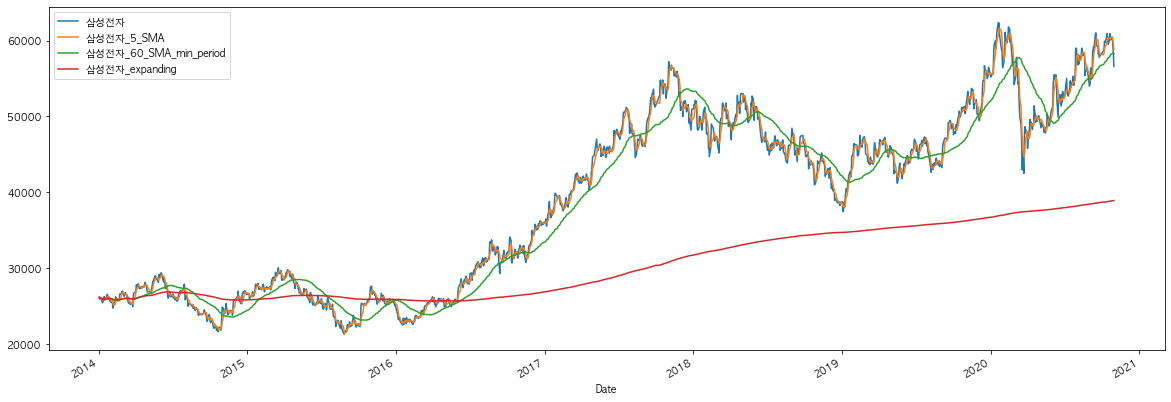

In [55]:
df.plot(figsize=(20, 7));

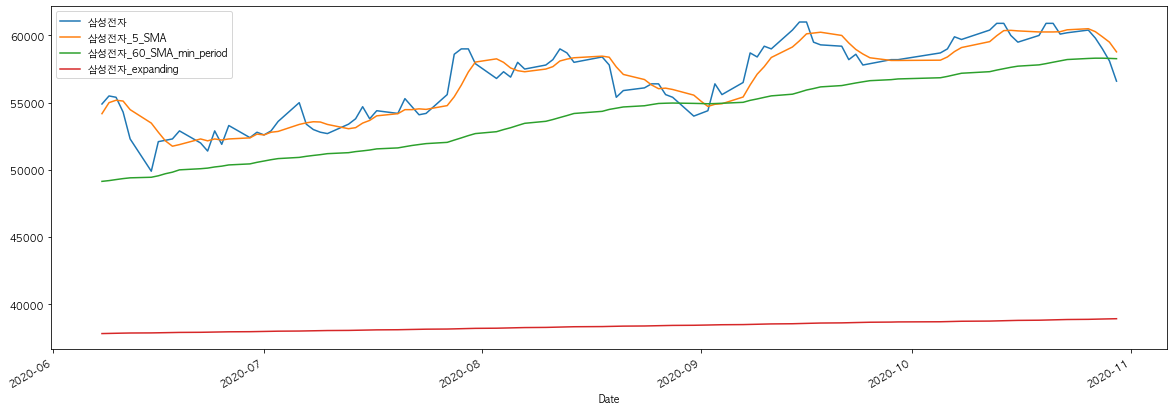

In [58]:
# 최근 100 거래일 기준
df.iloc[-100:].plot(figsize=(20, 7));